   MAIN_ID          RA         DEC     OTYPE 
                 "h:m:s"     "d:m:s"         
-------------- ----------- ----------- ------
[KLK2016] X136 13 29 44.91 +47 11 28.3 Galaxy
   MAIN_ID         RA         DEC     OTYPE 
                "h:m:s"     "d:m:s"         
------------- ----------- ----------- ------
[KLK2016] X99 13 29 38.57 +47 10 02.2 Galaxy
   MAIN_ID          RA         DEC     OTYPE 
                 "h:m:s"     "d:m:s"         
-------------- ----------- ----------- ------
[KLK2016] X388 13 30 08.19 +47 13 21.7 Galaxy
   MAIN_ID          RA         DEC     OTYPE 
                 "h:m:s"     "d:m:s"         
-------------- ----------- ----------- ------
[KLK2016] X398 13 30 11.54 +47 12 14.9 Galaxy
   MAIN_ID          RA         DEC     OTYPE 
                 "h:m:s"     "d:m:s"         
-------------- ----------- ----------- ------
[KLK2016] X379 13 30 06.70 +47 09 15.3 Galaxy
   MAIN_ID          RA         DEC     OTYPE 
                 "h:m:s"     "d:m:s"  

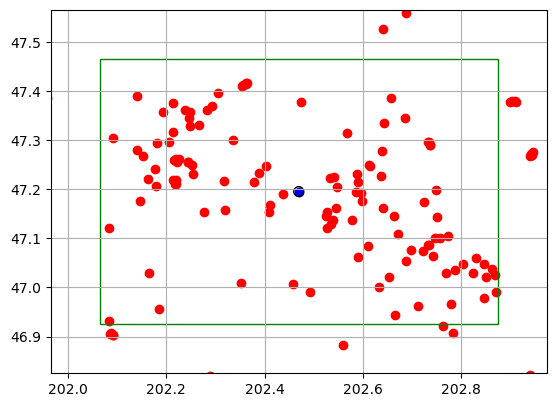

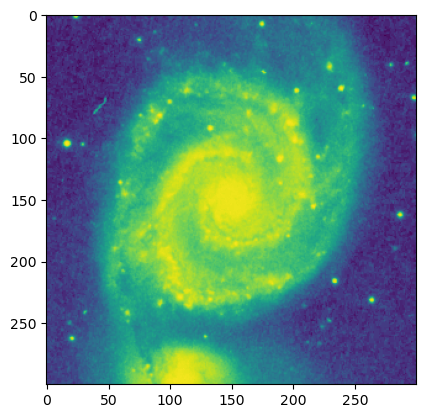

In [223]:
import matplotlib.pyplot as plt
from astroquery.simbad import Simbad
from astropy.coordinates import SkyCoord
from astroquery.skyview import SkyView
import astropy.units as u

from astropy.visualization import simple_norm


# these coordinates will be provided by the status API

# using m51 as an example
ra = 202.469575
dec = 47.1952583

target = SkyCoord(ra=ra, dec=dec, unit="deg", frame="icrs")
# target = SkyCoord(ra=83.63888889, dec=22.01444444, unit='deg', frame='icrs')
# target = SkyCoord(ra="13h 29m 52.7s", dec="+47d 11m 42s", frame="icrs")

# get image from database

image = SkyView.get_images(position=target, survey=["DSS"])[0][0]

# plt.imshow(image.data, origin='lower')


# get nearby objects

results = Simbad.query_region(target, radius=0.5 * u.deg)

Simbad.reset_votable_fields()
Simbad.add_votable_fields('otype')
count = 0

new_list = []
for r in results:
    if "Galaxy" in r["OTYPE"]:
        print(r["MAIN_ID", "RA", "DEC", "OTYPE"])
        new_list.append(r["MAIN_ID", "RA", "DEC", "OTYPE"])



list = []
for r in new_list:

    new = SkyCoord(ra=r["RA"], dec=r["DEC"], unit=(u.hourangle, u.deg), frame="icrs")
    
    
    list.append((new, r["MAIN_ID"]))
  

# print(list[0])
# print(list[-1])





    
fig, ax = plt.subplots()
for l in list:
    
    ax.scatter(l[0].ra.deg, l[0].dec.deg, color='red')  
     
# for l in list:
#     ax.annotate(l[1], (l[0].ra.deg,l[0].dec.deg))
    
    
ax.scatter(target.ra.deg, target.dec.deg, color='blue')    
    
radius = 0.01
circle = plt.Circle( (target.ra.deg, target.dec.deg), radius, fill = False )    
    
ax.add_patch(circle)


rect = plt.Rectangle((target.ra.deg - 0.81/2, target.dec.deg - 0.54/2), 0.81, 0.54, linewidth=1, edgecolor='g', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)
    

ax.set_aspect('equal')  

# plt.xlim(target.ra.deg -radius, target.ra.deg +radius)
# plt.ylim(target.dec.deg -radius, target.dec.deg +radius)

xbox = 0.81/2 + 0.1
ybox = 0.54/2 + 0.1

plt.xlim(target.ra.deg -xbox, target.ra.deg +xbox)
plt.ylim(target.dec.deg -ybox, target.dec.deg +ybox)

plt.grid()
plt.show()


norm = simple_norm(image.data, 'asinh')
plt.imshow(image.data, norm=norm)

165
(13.54522289, 47.19119444) (hourangle, deg)


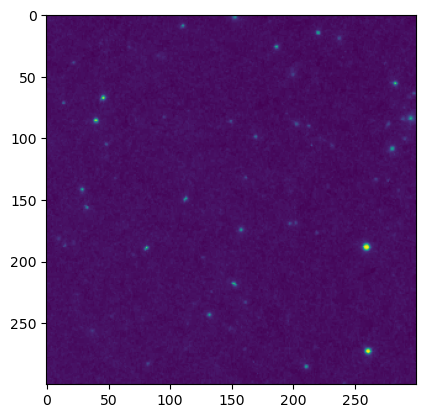

In [237]:
Simbad.reset_votable_fields()
Simbad.add_votable_fields('otype')
count = 0

new_list = []
for r in results:
    if "Galaxy" in r["OTYPE"]:
        # print(r["MAIN_ID", "RA", "DEC", "OTYPE"])
        new_list.append(r["MAIN_ID", "RA", "DEC", "OTYPE"])
        count += 1
print(count)


# print(new_list[0])

test = SkyCoord(ra=new_list[-1]["RA"], dec=new_list[0]["DEC"], unit=(u.hourangle, u.deg), frame="icrs")
print(test.data)

a = SkyView.get_images(position=test, survey=["DSS"])[0][0]
norm = simple_norm(image.data, 'linear')
plt.imshow(a.data, norm=norm)

In [226]:
results

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,OTYPE,SCRIPT_NUMBER_ID
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,object,int32
M 51,13 29 52.698,+47 11 42.93,7,7,--,--,0,C,I,2006AJ....131.1163S,Seyfert2,1
RX J132952+47117,13 29 52.7,+47 11 43,5,5,5200.000,5200.000,90,D,,1995A&A...295..289E,X,1
FIRST J132952.8+471140,13 29 52.7102,+47 11 42.746,9,9,--,--,0,B,R,2015MNRAS.452...32R,Radio,1
PAWS GMC 973,13 29 52.670,+47 11 42.80,7,7,--,--,0,C,m,2014ApJ...784....3C,MolCld,1
[MCK2007] 53,13 29 52.73,+47 11 43.0,6,6,10.000,10.000,90,D,X,2016ApJ...827...46K,Radio,1
[TH94] M 51 3,13 29 52.711,+47 11 42.61,7,7,--,--,0,D,,,Radio,1
[PHB96] 212,13 29 52.677,+47 11 42.60,7,7,--,--,0,D,,,HIIReg,1
PAWS GMC 975,13 29 52.630,+47 11 42.31,7,7,--,--,0,C,m,2014ApJ...784....3C,MolCld,1
